# Basketball on Paper

## Table of Contents
1. [Data import](#paragraph1)
2. [Data preparation](#paragraph2)
3. [Data exploratory analysis](#paragraph3)
4. [Hypothesis testing](#paragraph4)
5. [Summary conclusion](#paragraph5)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

## Data import <a name="paragraph1"></a>

In [3]:
data_type_dict = {'GAME_ID': str}

In [4]:
#2018-19 Regular season game log
game_log = pd.read_csv('data/game_log.csv', dtype=data_type_dict) 
#dtype parameter added to preserve leading zeros for GAME_IDs
game_log.head() 

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,1610612744,GSW,Golden State Warriors,0021801225,2019-04-10,GSW @ MEM,L,240,46,92,0.500,13,30,0.433,12,14,0.857,9,30,39,32,3,5,14,17,117,-15,1
1,22018,1610612763,MEM,Memphis Grizzlies,0021801225,2019-04-10,MEM vs. GSW,W,240,48,98,0.490,21,46,0.457,15,18,0.833,15,34,49,25,9,0,11,18,132,15,1
2,22018,1610612766,CHA,Charlotte Hornets,0021801222,2019-04-10,CHA vs. ORL,L,240,41,78,0.526,8,29,0.276,24,27,0.889,4,28,32,21,3,4,8,14,114,-8,1
3,22018,1610612753,ORL,Orlando Magic,0021801222,2019-04-10,ORL @ CHA,W,240,48,88,0.545,11,30,0.367,15,20,0.750,9,30,39,24,5,2,6,19,122,8,1
4,22018,1610612750,MIN,Minnesota Timberwolves,0021801228,2019-04-10,MIN @ DEN,L,240,39,91,0.429,13,32,0.406,4,6,0.667,7,34,41,24,6,0,10,22,95,-4,1


In [5]:
game_log_subset = game_log[['GAME_ID', 'TEAM_ID', 'WL']]
#subset created to add 'WL' outcomes to other dataframes

In [6]:
#2018-19 Regular season stats by team
leaguedashteamstats = pd.read_csv('data/leaguedashteamstats.csv')
leaguedashteamstats.head()
#this dataset for reference only

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,82,29,53,0.354,3971.0,3392,7524,0.451,1067,3034,0.352,1443,1918,0.752,955,2825,3780,2118,1397.0,675,419,448,1932,1817,9294,-494.0,1,26,26,26,7,15,4,21,4,3,16,18,12,21,4,18,12,10,30,11,14,24,29,5,12,26,10,Atlanta Hawks
1,1610612738,Boston Celtics,82,49,33,0.598,3956.0,3451,7423,0.465,1032,2829,0.365,1282,1598,0.802,804,2849,3653,2155,1052.0,706,435,317,1670,1602,9216,364.0,1,9,9,9,18,11,9,14,6,7,7,28,29,4,20,16,22,5,3,4,10,2,12,26,14,6,10,Boston Celtics
2,1610612751,Brooklyn Nets,82,42,40,0.512,3996.0,3301,7358,0.449,1047,2965,0.353,1555,2088,0.745,900,2919,3819,1954,1236.0,539,339,432,1763,1807,9204,-6.0,1,14,14,14,1,20,14,25,5,5,14,6,4,24,10,10,7,21,26,27,28,22,23,7,15,15,10,Brooklyn Nets
3,1610612766,Charlotte Hornets,82,39,43,0.476,3966.0,3297,7362,0.448,977,2783,0.351,1510,1895,0.797,814,2778,3592,1905,1001.0,591,405,492,1550,1686,9081,-90.0,1,17,17,17,11,21,12,26,11,10,18,9,16,6,19,22,23,24,2,21,18,29,3,18,19,18,10,Charlotte Hornets
4,1610612741,Chicago Bulls,82,22,60,0.268,3981.0,3266,7205,0.453,745,2123,0.351,1328,1695,0.783,718,2799,3517,1796,1159.0,603,351,473,1663,1534,8605,-690.0,1,27,27,27,3,23,22,20,30,27,19,25,26,11,30,21,25,27,19,20,26,28,9,30,27,27,10,Chicago Bulls


In [7]:
#2018-19 Regular season advanced game stats
boxscoreadvancedv2 = pd.read_csv('data/boxscoreadvancedv2.csv', dtype=data_type_dict)
#dtype parameter added to preserve leading zeros for GAME_IDs
boxscoreadvancedv2.head()

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0021801225,1610612763,Grizzlies,MEM,Memphis,240:00,129.5,130.7,113.4,115.8,16.1,14.9,0.521,2.27,17.6,0.346,0.745,0.535,10.793,10.9,0.597,0.623,1.0,0.200,102.54,101.0,84.17,101,0.533
1,0021801225,1610612744,Warriors,GSW,Golden State,240:00,113.4,115.8,129.5,130.7,-16.1,-14.9,0.696,2.29,22.2,0.255,0.654,0.465,13.571,13.9,0.571,0.596,1.0,0.198,102.54,101.0,84.17,101,0.467
2,0021801222,1610612753,Magic,ORL,Orlando,240:00,130.1,131.2,121.4,122.6,8.6,8.6,0.500,4.00,18.9,0.286,0.816,0.538,6.397,6.5,0.608,0.630,1.0,0.200,93.84,93.0,77.50,93,0.519
3,0021801222,1610612766,Hornets,CHA,Charlotte,240:00,121.4,122.6,130.1,131.2,-8.6,-8.6,0.512,2.63,17.7,0.184,0.714,0.463,8.522,8.6,0.577,0.634,1.0,0.200,93.84,93.0,77.50,93,0.481
4,0021801228,1610612750,Timberwolves,MIN,Minnesota,240:00,98.3,99.0,103.7,103.1,-5.4,-4.2,0.615,2.40,18.8,0.167,0.745,0.448,10.348,10.4,0.500,0.507,1.0,0.199,96.06,96.0,80.00,96,0.438


In [8]:
boxscoreadvancedv2 = game_log_subset.set_index(['GAME_ID', 'TEAM_ID']).join(
    boxscoreadvancedv2.set_index(['GAME_ID', 'TEAM_ID']), how='outer')

In [9]:
#2018-19 Regular season box score game stats
boxscorefourfactor = pd.read_csv('data/boxscorefourfactorsv2.csv', dtype=data_type_dict)
#dtype parameter added to preserve leading zeros for GAME_IDs
boxscorefourfactor.head()

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
0,0021801225,1610612763,Grizzlies,MEM,Memphis,240:00,0.597,0.184,0.108,0.288,0.571,0.152,0.136,0.255
1,0021801225,1610612744,Warriors,GSW,Golden State,240:00,0.571,0.152,0.136,0.191,0.597,0.184,0.108,0.346
2,0021801222,1610612753,Magic,ORL,Orlando,240:00,0.608,0.227,0.064,0.214,0.577,0.346,0.085,0.184
3,0021801222,1610612766,Hornets,CHA,Charlotte,240:00,0.577,0.346,0.085,0.105,0.608,0.227,0.064,0.286
4,0021801228,1610612750,Timberwolves,MIN,Minnesota,240:00,0.500,0.066,0.103,0.130,0.506,0.195,0.136,0.255


In [10]:
boxscorefourfactor = game_log_subset.set_index(['GAME_ID', 'TEAM_ID']).join(
    boxscorefourfactor.set_index(['GAME_ID', 'TEAM_ID']), how='outer')

In [11]:
#2018-19 Regular season miscellaneous box score game stats
boxscoremiscv2 = pd.read_csv('data/boxscoremiscv2.csv', dtype=data_type_dict)
#dtype parameter added to preserve leading zeros for GAME_IDs
boxscoremiscv2.head()
#this dataset for reference only

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,MIN,PTS_OFF_TOV,PTS_2ND_CHANCE,PTS_FB,PTS_PAINT,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,BLK,BLKA,PF,PFD
0,21801225,1610612763,Grizzlies,MEM,Memphis,240:00:00,14,21,19,42,14,12,21,48,0,5,18,17
1,21801225,1610612744,Warriors,GSW,Golden State,240:00:00,14,12,21,48,14,21,19,42,5,0,17,18
2,21801222,1610612753,Magic,ORL,Orlando,240:00:00,11,14,4,62,8,7,12,58,2,4,19,14
3,21801222,1610612766,Hornets,CHA,Charlotte,240:00:00,8,7,12,58,11,14,4,62,4,2,14,19
4,21801228,1610612750,Timberwolves,MIN,Minnesota,240:00:00,12,9,7,38,5,14,8,44,0,4,22,12


## Data Preparation <a name="paragraph2"></a>

In [12]:
game_log.shape
#30 teams each play 82 games in a regular season

(2460, 29)

In [13]:
game_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_ID          2460 non-null   int64  
 1   TEAM_ID            2460 non-null   int64  
 2   TEAM_ABBREVIATION  2460 non-null   object 
 3   TEAM_NAME          2460 non-null   object 
 4   GAME_ID            2460 non-null   object 
 5   GAME_DATE          2460 non-null   object 
 6   MATCHUP            2460 non-null   object 
 7   WL                 2460 non-null   object 
 8   MIN                2460 non-null   int64  
 9   FGM                2460 non-null   int64  
 10  FGA                2460 non-null   int64  
 11  FG_PCT             2460 non-null   float64
 12  FG3M               2460 non-null   int64  
 13  FG3A               2460 non-null   int64  
 14  FG3_PCT            2460 non-null   float64
 15  FTM                2460 non-null   int64  
 16  FTA                2460 

In [14]:
leaguedashteamstats.shape
#30 teams in the nba league

(30, 56)

In [15]:
leaguedashteamstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TEAM_ID          30 non-null     int64  
 1   TEAM_NAME        30 non-null     object 
 2   GP               30 non-null     int64  
 3   W                30 non-null     int64  
 4   L                30 non-null     int64  
 5   W_PCT            30 non-null     float64
 6   MIN              30 non-null     float64
 7   FGM              30 non-null     int64  
 8   FGA              30 non-null     int64  
 9   FG_PCT           30 non-null     float64
 10  FG3M             30 non-null     int64  
 11  FG3A             30 non-null     int64  
 12  FG3_PCT          30 non-null     float64
 13  FTM              30 non-null     int64  
 14  FTA              30 non-null     int64  
 15  FT_PCT           30 non-null     float64
 16  OREB             30 non-null     int64  
 17  DREB             3

In [16]:
boxscoreadvancedv2.shape

(2460, 28)

In [17]:
boxscoreadvancedv2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2460 entries, ('0021800001', 1610612738) to ('0021801230', 1610612758)
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   WL                 2460 non-null   object 
 1   TEAM_NAME          2460 non-null   object 
 2   TEAM_ABBREVIATION  2460 non-null   object 
 3   TEAM_CITY          2460 non-null   object 
 4   MIN                2460 non-null   object 
 5   E_OFF_RATING       2460 non-null   float64
 6   OFF_RATING         2460 non-null   float64
 7   E_DEF_RATING       2460 non-null   float64
 8   DEF_RATING         2460 non-null   float64
 9   E_NET_RATING       2460 non-null   float64
 10  NET_RATING         2460 non-null   float64
 11  AST_PCT            2460 non-null   float64
 12  AST_TOV            2460 non-null   float64
 13  AST_RATIO          2460 non-null   float64
 14  OREB_PCT           2460 non-null   float64
 15  DREB_PCT           2460 n

In [18]:
boxscorefourfactor.shape

(2460, 13)

In [19]:
boxscorefourfactor.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2460 entries, ('0021800001', 1610612738) to ('0021801230', 1610612758)
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   WL                 2460 non-null   object 
 1   TEAM_NAME          2460 non-null   object 
 2   TEAM_ABBREVIATION  2460 non-null   object 
 3   TEAM_CITY          2460 non-null   object 
 4   MIN                2460 non-null   object 
 5   EFG_PCT            2460 non-null   float64
 6   FTA_RATE           2460 non-null   float64
 7   TM_TOV_PCT         2460 non-null   float64
 8   OREB_PCT           2460 non-null   float64
 9   OPP_EFG_PCT        2460 non-null   float64
 10  OPP_FTA_RATE       2460 non-null   float64
 11  OPP_TOV_PCT        2460 non-null   float64
 12  OPP_OREB_PCT       2460 non-null   float64
dtypes: float64(8), object(5)
memory usage: 308.3+ KB


In [20]:
boxscoremiscv2.shape

(2460, 18)

In [21]:
boxscoremiscv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   GAME_ID             2460 non-null   object
 1   TEAM_ID             2460 non-null   int64 
 2   TEAM_NAME           2460 non-null   object
 3   TEAM_ABBREVIATION   2460 non-null   object
 4   TEAM_CITY           2460 non-null   object
 5   MIN                 2460 non-null   object
 6   PTS_OFF_TOV         2460 non-null   int64 
 7   PTS_2ND_CHANCE      2460 non-null   int64 
 8   PTS_FB              2460 non-null   int64 
 9   PTS_PAINT           2460 non-null   int64 
 10  OPP_PTS_OFF_TOV     2460 non-null   int64 
 11  OPP_PTS_2ND_CHANCE  2460 non-null   int64 
 12  OPP_PTS_FB          2460 non-null   int64 
 13  OPP_PTS_PAINT       2460 non-null   int64 
 14  BLK                 2460 non-null   int64 
 15  BLKA                2460 non-null   int64 
 16  PF                  2460

In [22]:
game_log['FTA_RATE'] = game_log['FTA'] / game_log['FGA']
#free throw attempt rate computed as free throw attempts divided by field goal attempts

In [23]:
game_win_query = game_log.query('WL == "W"')
game_loss_query = game_log.query('WL == "L"')

In [24]:
boxscoreadv_win_query = boxscoreadvancedv2.query('WL == "W"')
boxscoreadv_loss_query = boxscoreadvancedv2.query('WL == "L"')

In [25]:
boxscorefour_win_query = boxscorefourfactor.query('WL == "W"')
boxscorefour_loss_query = boxscorefourfactor.query('WL == "L"')

## Data Exploratory Analysis <a name="paragraph3"></a>

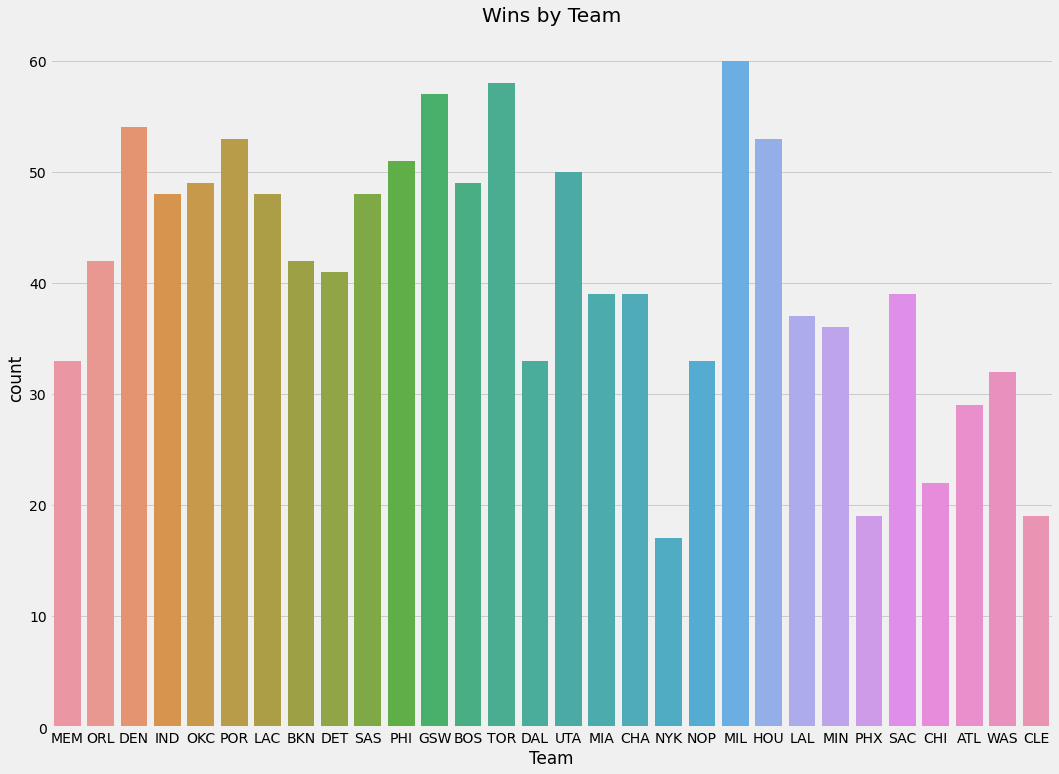

In [26]:
fig, ax = plt.subplots(figsize=(16,12))
sns.countplot(data=game_win_query, x='TEAM_ABBREVIATION', ax=ax, label='Team')
ax.set_xlabel('Team')
ax.set_title('Wins by Team');

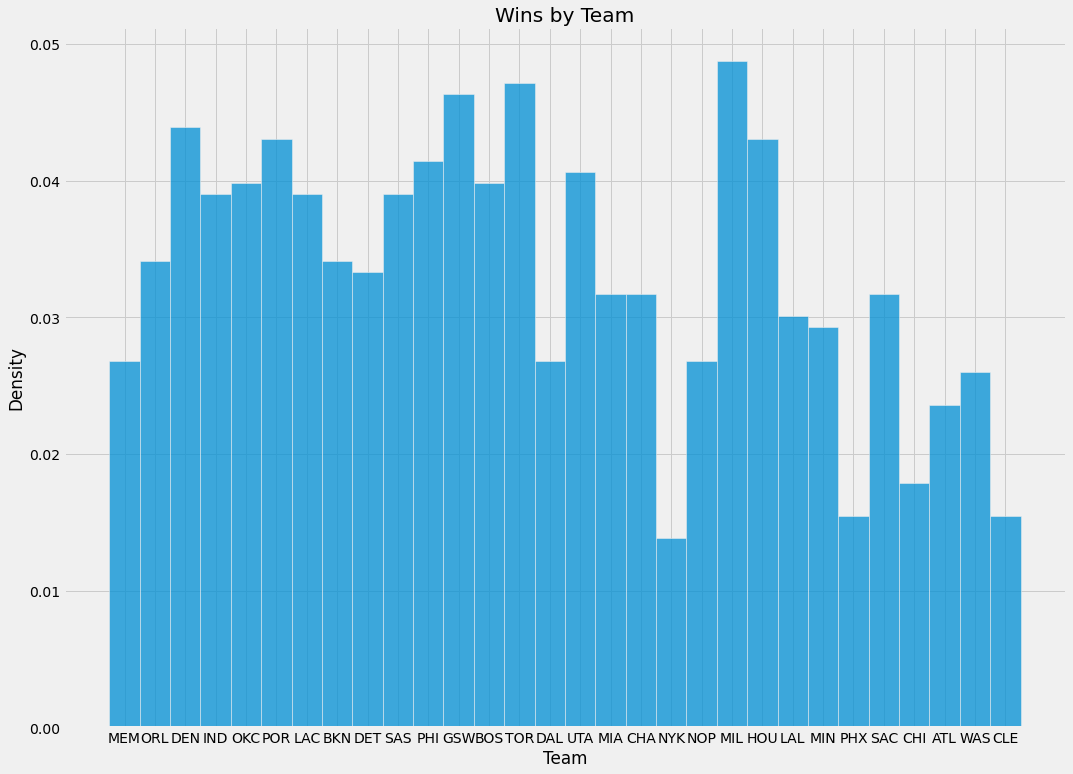

In [27]:
fig, ax = plt.subplots(figsize=(16,12))
sns.histplot(data=game_win_query, x='TEAM_ABBREVIATION', stat='density', ax=ax, label='Team')
ax.set_xlabel('Team')
ax.set_title('Wins by Team');

In [28]:
#function to plot histograms comparing winning and losing teams for a select statistic
def plot_histogram(w_data, l_data, xlabel, ylabel, title):
    fig, ax = plt.subplots()
    ax.hist(w_data, alpha=0.5, bins=35, label='Winning Teams')
    ax.hist(l_data, alpha=0.5, bins=35, label='Losing Teams')
    ax.set_xlabel(xlabel, size=12)
    ax.set_ylabel(ylabel, size=12)
    ax.set_title(title, size=15)
    ax.legend(prop={'size': 10});

### Field Goals

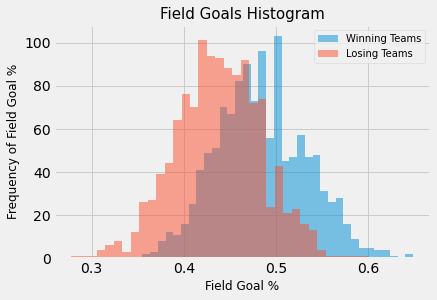

In [29]:
plot_histogram(game_win_query['FG_PCT'], game_loss_query['FG_PCT'], 
               'Field Goal %', 'Frequency of Field Goal %', 
              'Field Goals Histogram')

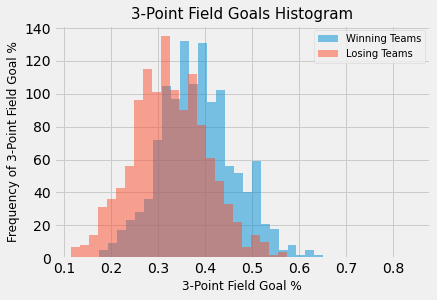

In [30]:
plot_histogram(game_win_query['FG3_PCT'], game_loss_query['FG3_PCT'], 
               '3-Point Field Goal %', 'Frequency of 3-Point Field Goal %', 
              '3-Point Field Goals Histogram')

### Turnovers

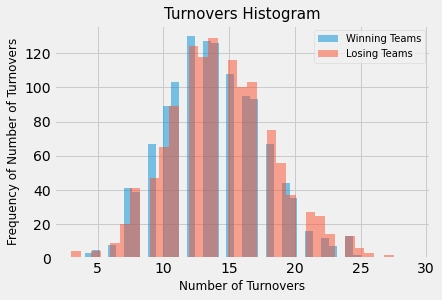

In [31]:
plot_histogram(game_win_query['TOV'], game_loss_query['TOV'], 
               'Number of Turnovers', 'Frequency of Number of Turnovers', 
              'Turnovers Histogram')

### Rebounding

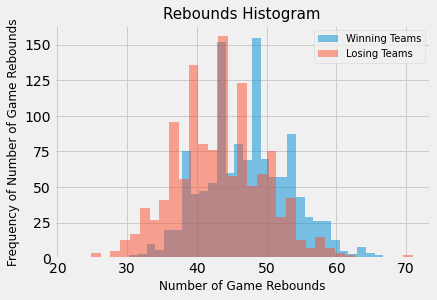

In [32]:
plot_histogram(game_win_query['REB'], game_loss_query['REB'], 
               'Number of Game Rebounds', 'Frequency of Number of Game Rebounds', 
              'Rebounds Histogram')
#below the game rebounds are split by offensive and defensive rebounds

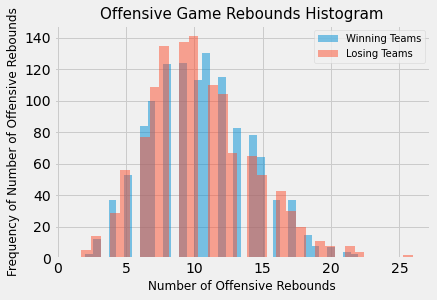

In [33]:
plot_histogram(game_win_query['OREB'], game_loss_query['OREB'], 
               'Number of Offensive Rebounds', 'Frequency of Number of Offensive Rebounds', 
              'Offensive Game Rebounds Histogram')
#offensive rebounds are far less common compared to defensive rebounds

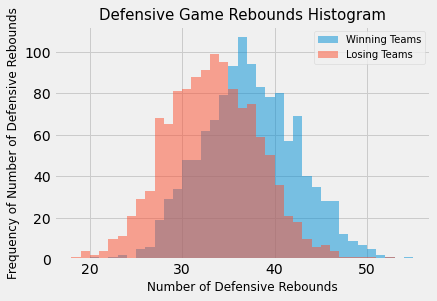

In [34]:
plot_histogram(game_win_query['DREB'], game_loss_query['DREB'], 
               'Number of Defensive Rebounds', 
               'Frequency of Number of Defensive Rebounds', 
               'Defensive Game Rebounds Histogram')
#defensive rebounds are far more common compared to offensive rebounds

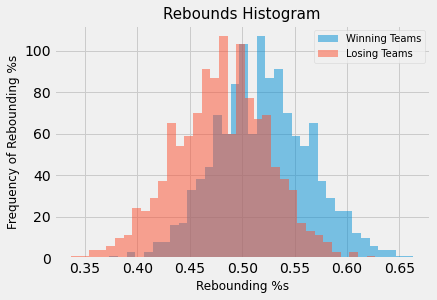

In [35]:
plot_histogram(boxscoreadv_win_query['REB_PCT'], boxscoreadv_loss_query['REB_PCT'], 
               'Rebounding %s', 'Frequency of Rebounding %s', 
               'Rebounds Histogram')

### Free Throws

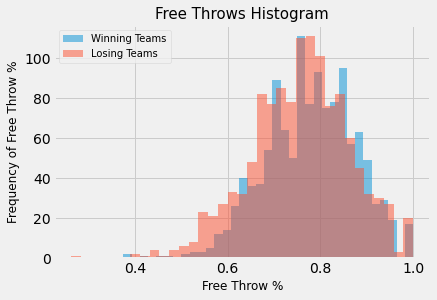

In [36]:
plot_histogram(game_win_query['FT_PCT'], game_loss_query['FT_PCT'], 
               'Free Throw %', 'Frequency of Free Throw %', 
               'Free Throws Histogram')

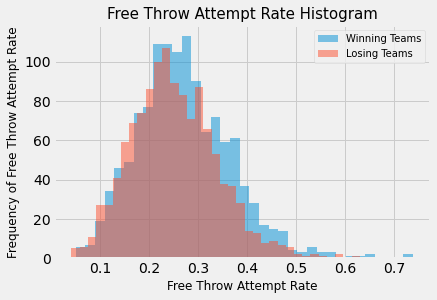

In [37]:
plot_histogram(game_win_query['FTA_RATE'], game_loss_query['FTA_RATE'], 
               'Free Throw Attempt Rate', 'Frequency of Free Throw Attempt Rate', 
               'Free Throw Attempt Rate Histogram')

### Assists, Steals, Blocks

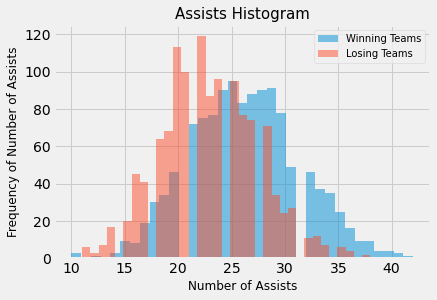

In [38]:
plot_histogram(game_win_query['AST'], game_loss_query['AST'], 
               'Number of Assists', 'Frequency of Number of Assists', 
               'Assists Histogram')

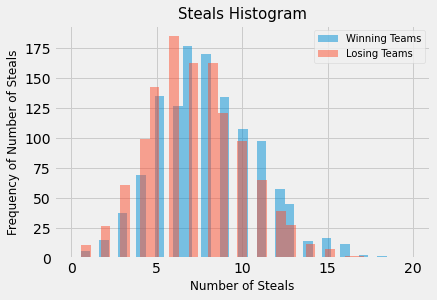

In [39]:
plot_histogram(game_win_query['STL'], game_loss_query['STL'], 
               'Number of Steals', 'Frequency of Number of Steals', 
               'Steals Histogram')

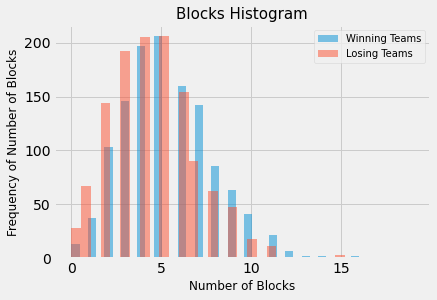

In [40]:
plot_histogram(game_win_query['BLK'], game_loss_query['BLK'], 
               'Number of Blocks', 'Frequency of Number of Blocks', 
               'Blocks Histogram')

## Hypothesis Testing <a name="paragraph4"></a>

**Scientific question:** Does offensive rebounding %s impact game outcomes? 

**Null:** Offensive rebounding %s have no impact on achieving game wins.

**Alternative:** Offensive rebounding %s have an impact on achieving game wins.

**Test statistic:** 2,460 regular season games from the 2018 - 19 NBA season

**Distribution under null hypothesis:** t distribution

**Significance Level:** 1%

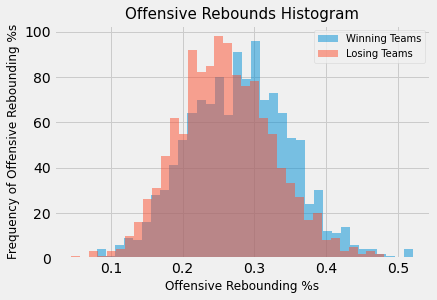

In [41]:
plot_histogram(boxscoreadv_win_query['OREB_PCT'], boxscoreadv_loss_query['OREB_PCT'], 
               'Offensive Rebounding %s', 'Frequency of Offensive Rebounding %s', 
               'Offensive Rebounds Histogram')

In [42]:
p_val_oreb_pct = stats.ttest_ind(boxscorefour_win_query['OREB_PCT'], boxscorefour_loss_query['OREB_PCT'], equal_var=False)
print("p-value for offensive rebounding %s of winning and losing teams: {}".format(p_val_oreb_pct[1]))

p-value for offensive rebounding %s of winning and losing teams: 1.1728088676657435e-13


## Summary Conclusion <a name="paragraph5"></a>

The null hypothesis is rejected - there is statistical evidence to infer that strong offensive rebounding is characteristic achieving game wins.